# Marketing Campaign Performance Insights
#### Objective:
This project analyzes digital marketing campaigns to optimize ROI and performance by examining key metrics like conversion rates, acquisition costs, and ROI across various channels, campaign types, and audience segments. It explores temporal trends, geographical influences, and audience behavior to identify success factors and enhance future marketing strategies.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ArchanaAnalytics/DS-Portfolio/refs/heads/main/Datasets/marketing_campaign.csv")

##  Descriptive Analysis

##### a) Basic Structure :

In [2]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [3]:
rows, cols = df.shape
print(f"{'Number of rows':<20}: {rows}\n{'Number of columns':<20}: {cols:<20}")

Number of rows      : 22029
Number of columns   : 16                  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [55]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'].dtype

dtype('<M8[ns]')

`Descriptive statistics` for numerical columns

In [7]:
df.drop(columns='Campaign_ID').describe().round(2)

,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.00,22029.00,22029.00,22029.00,22029.00,22029.00
mean,4.76,5522.74,182.86,2223.81,50610.40,6.58
std,0.96,2597.67,301.62,1394.17,28542.98,1.46
min,2.02,1000.00,-98.30,30.00,1001.00,4.00
25%,4.13,3286.00,-4.08,1067.00,25804.00,5.00
50%,4.76,5525.00,93.65,2088.00,50858.00,7.00
75%,5.43,7766.00,247.31,3212.00,75165.00,8.00
max,7.47,9999.00,3109.79,6887.00,99999.00,9.00


##### b) Data exploration :

In [6]:
print("Number of Unique Campaign IDs:", df.Campaign_ID.nunique())

Number of Unique Campaign IDs: 22029


- All campaign IDs are unique, meaning there are no duplicates in the dataset.
- The dataset reflects distinct campaigns, with each entry representing a unique campaign.

Unique values of the Location and Customer_Segment columns.

In [9]:
print("Unique Values in Location attribute:\n", df.Location.unique(),
      "\n\nUnique Values in Customer_Segment attribute:\n", df.Customer_Segment.unique())

Unique Values in Location attribute:
 ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco'] 

Unique Values in Customer_Segment attribute:
 ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


In [ ]:
df.Campaign_Type.value_counts()

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

In [ ]:
df.Channel_Used.value_counts()

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64

- The occurrences of each category in the "Campaign_Type" and "Channel_Used" columns show a balanced distribution, with no significant difference in the count of each value. The data is evenly spread across these categories.

## Exploratory Data Analysis (EDA) and Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution of Categorical Features:

In [56]:
categorical_cols = df.select_dtypes(include='O').columns.to_list()
print(categorical_cols)

['Company', 'Campaign_Type', 'Target_Audience', 'Duration', 'Channel_Used', 'Location', 'Language', 'Customer_Segment']


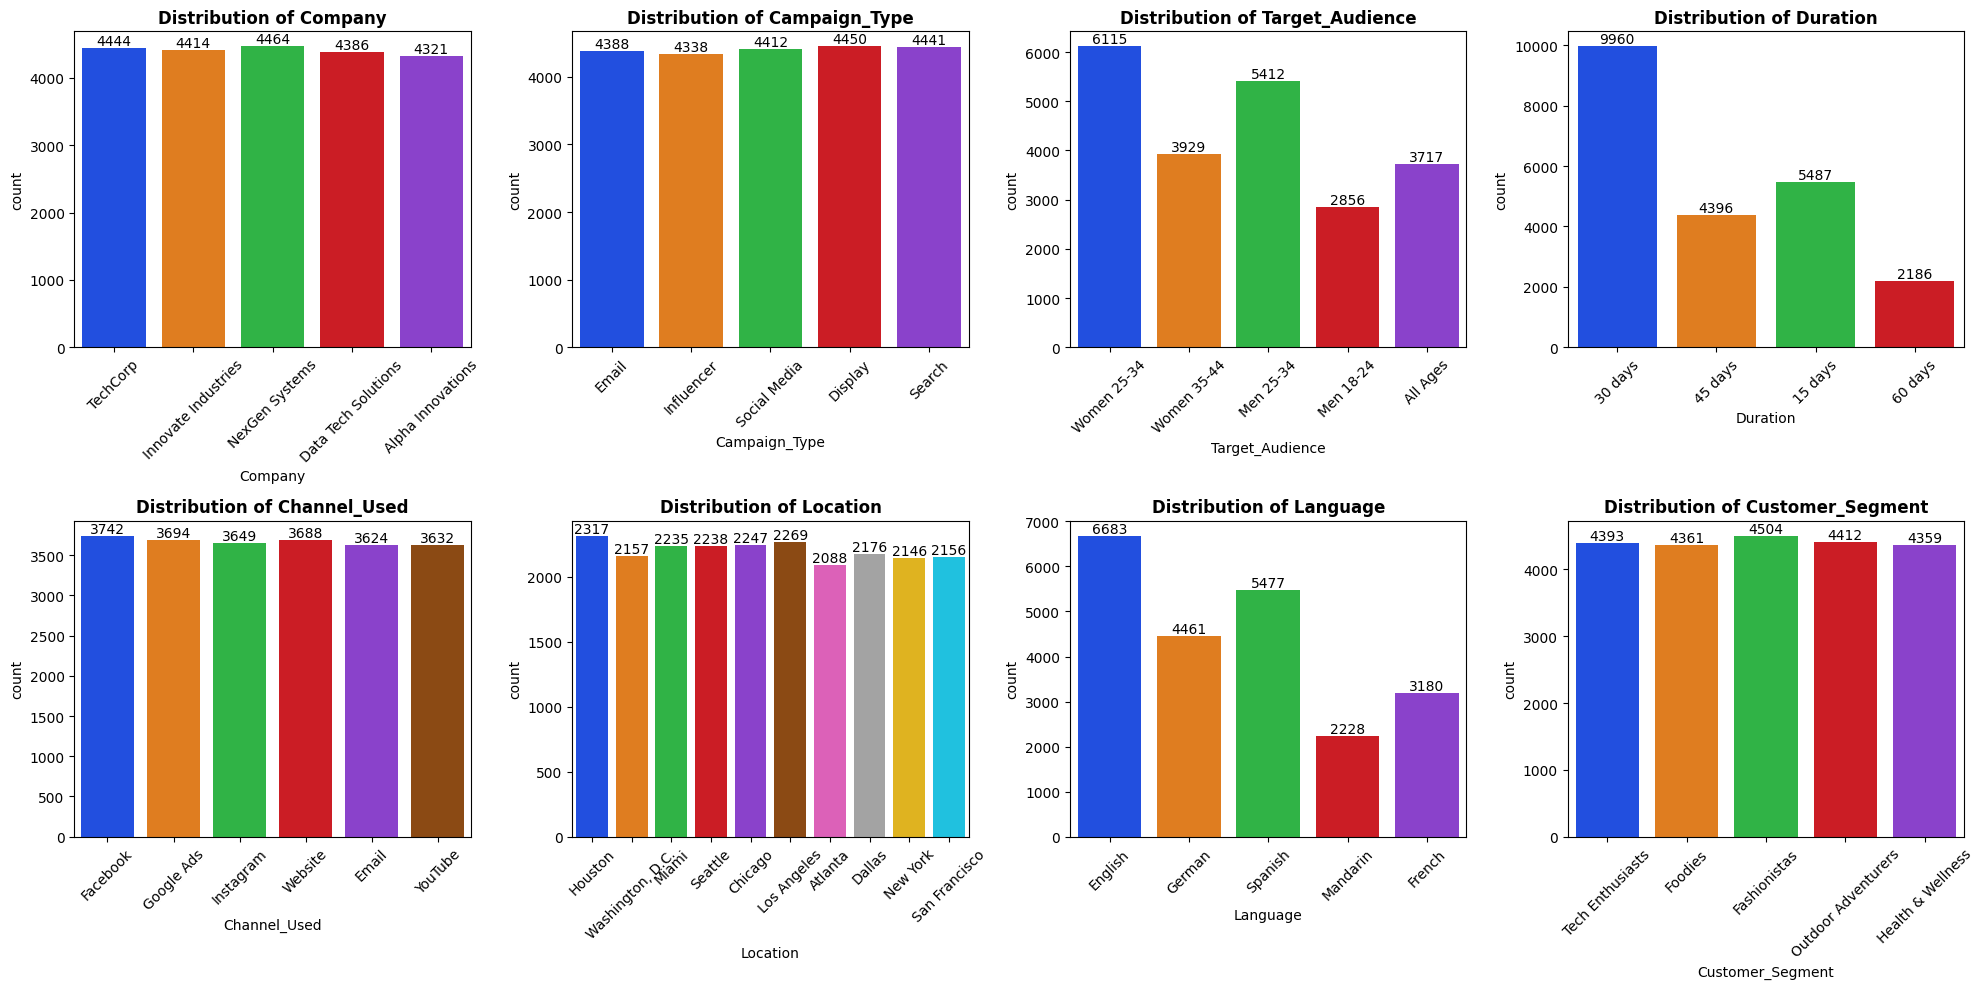

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for col, subplot in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=col, data=df, ax=subplot, hue=col, palette='bright').set_title(f'Distribution of {col}', fontweight='bold')
    for container in subplot.containers: subplot.bar_label(container)
    subplot.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

- The distribution plots reveal that most features are uniformly distributed, indicating balanced representation across companies, campaign types, customer segments, and channels used. However, specific preferences are evident in target audience demographics, with Women (25-34) being the most targeted, and in campaign durations, with 30-day campaigns being the most common. Language distribution shows English as the dominant choice, reflecting its widespread reach in the campaigns.


### Distribution of Numerical Features:

In [69]:
numerical_cols = df.drop(columns='Campaign_ID').select_dtypes('number').columns.to_list()
print(numerical_cols)

['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']


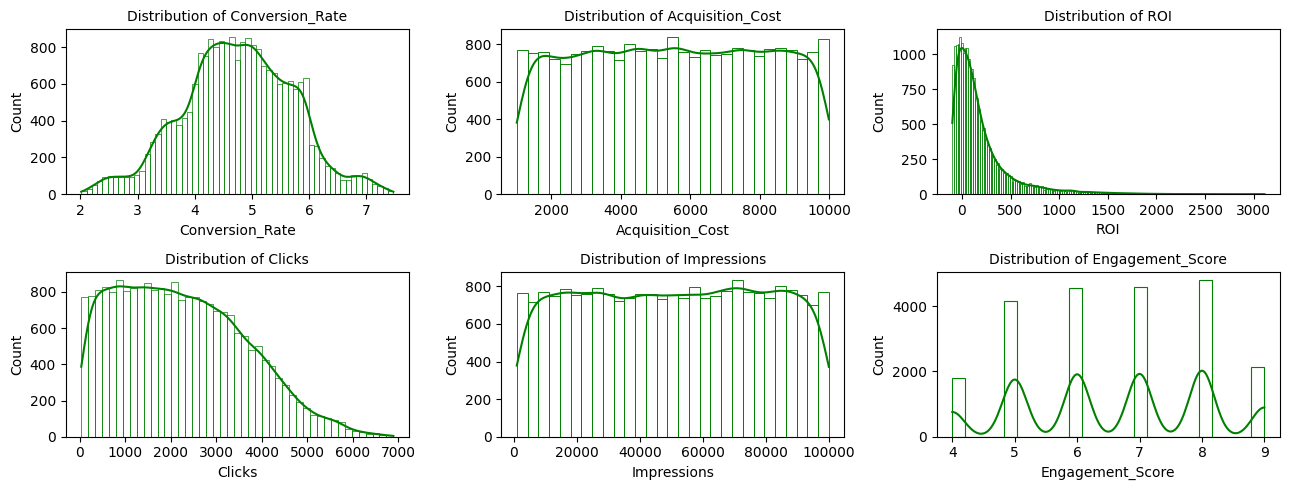

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13,5))
axes = axes.flatten()
for index, col in enumerate(numerical_cols):
    sns.histplot(data= df, x=col, kde=True, color='green', ax=axes[index], fill=False).set_title('Distribution of '+col, fontsize=10)
plt.tight_layout()
plt.show()

- **Conversion Rate**: Follows a near-normal distribution, with most values centered around 4 to 6.
- **Acquisition Cost**: Uniformly distributed, indicating consistent spending across campaigns.
- **ROI**: Highly skewed towards lower values, with the majority of campaigns yielding low returns.
- **Clicks**: Right-skewed distribution, showing that most campaigns receive fewer clicks, tapering off at higher counts.
- **Impressions**: Uniformly distributed, suggesting consistent exposure across campaigns.
- **Engagement Score**: Displays a periodic pattern, indicating clustering around specific scores like 5, 6, 7, 8.


### Campaign Performance :

##### Acquisition Cost by Return of Investment

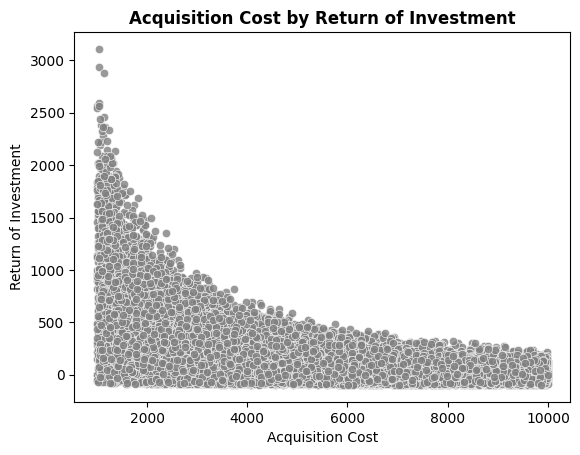

In [39]:
sns.scatterplot(x="Acquisition_Cost", y="ROI", data=df, color='grey', alpha=0.8)
plt.title("Acquisition Cost by Return of Investment", fontweight='bold')
plt.xlabel("Acquisition Cost")
plt.ylabel("Return of Investment")
plt.show()

Acquisition Cost is inversely ∝ to ROI, which shows that profitability is reduced with high acquisition cost, indicating the need for strategic adjustments.

##### Average Coversion Rate across Channel Used and Campaign Type

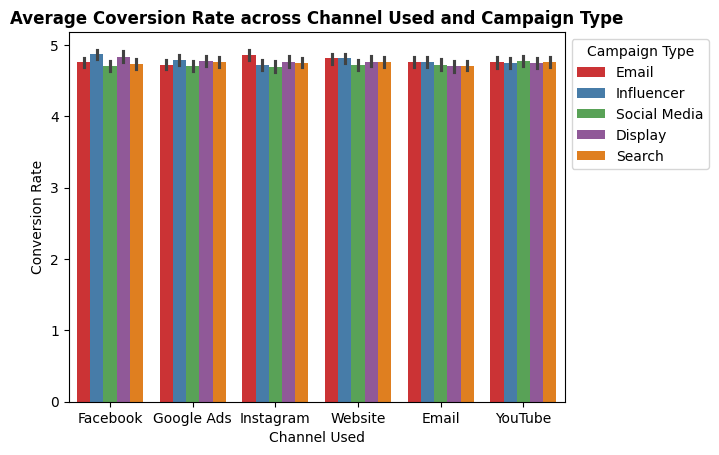

In [27]:
sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=df, palette='Set1')
plt.title('Average Coversion Rate across Channel Used and Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Conversion Rate')
plt.legend(title='Campaign Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- The bar plot indicates that marketing efforts are generally successful across all channels and campaign types, with minor performance variations.
- Influencer campaigns (blue bars) show higher conversion rates, especially on Facebook and websites, suggesting influencer marketing is effective.
- Email campaigns have the highest conversion rate on Instagram, highlighting a potential synergy between email and Instagram marketing.
- Social Media campaigns show slightly lower conversion rates on Facebook and Instagram, despite these being social platforms.
- Display ads (purple bars) perform consistently, with a slight edge on Facebook.
- Search campaigns (orange bars) perform well across all channels.

##### Engagement Score by Campaign Type

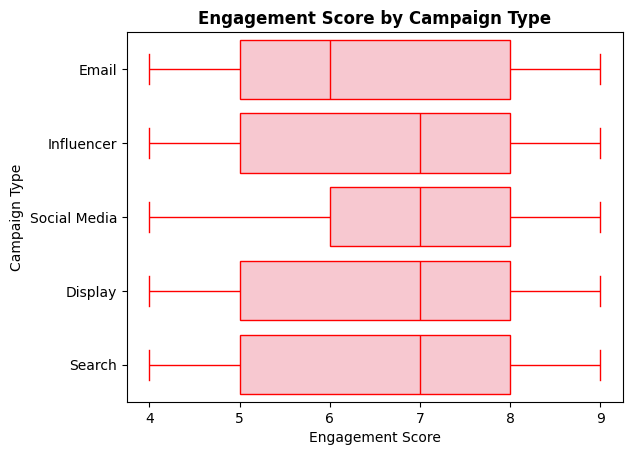

In [30]:
sns.boxplot(x='Engagement_Score', y='Campaign_Type', data=df, color='pink', linecolor='red')
plt.title('Engagement Score by Campaign Type', fontweight='bold')
plt.xlabel('Engagement Score')
plt.ylabel('Campaign Type')
plt.show()

- There are no significant outliers for any campaign type.
- All campaign types show generally good engagement, with most scores between 5 and 8.
- The median and interquartile range indicate equal performance across campaign types, with Email having the lowest median, suggesting more variability.
- Social Media has the smallest interquartile range, indicating more consistent engagement.

##### Average Return of Investment by Company

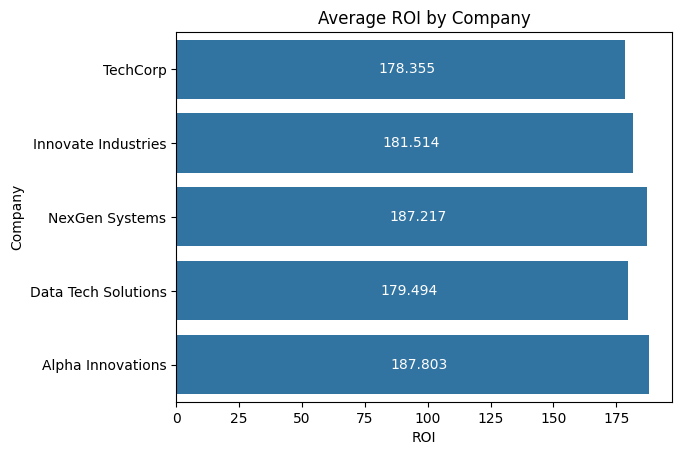

In [44]:
ax = sns.barplot(data=df, y='Company', x='ROI', errorbar=None)
ax.bar_label(ax.containers[0], padding=5, label_type='center', color='white', fontsize=10)
plt.title('Average ROI by Company')
plt.show()

- Most companies in the dataset have a uniform average ROI, indicating equal performance and competition. However, "Alpha Innovations" and "NextGen Systems" stand out with taller bars, showing they are the forerunners in terms of efficiency.

##### Correlation Insights between Campaign Metrics

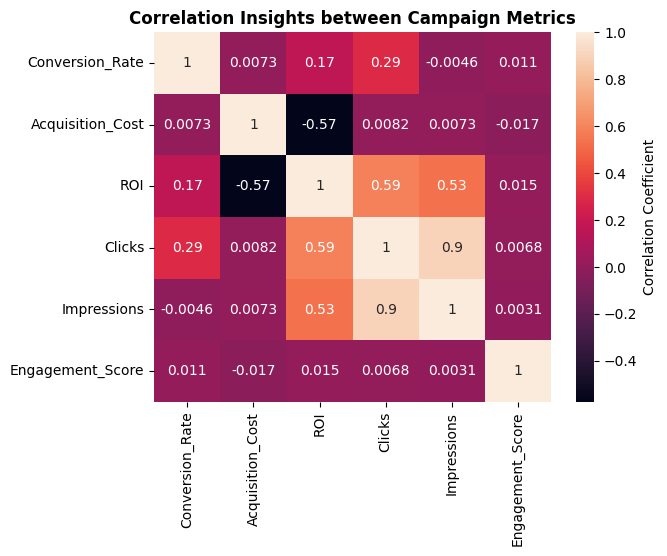

In [51]:
sns.heatmap(df.drop(columns='Campaign_ID').corr(numeric_only=True), annot=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Insights between Campaign Metrics', fontweight='bold')
plt.show()

- There is a moderate positive correlation between **Clicks** and **ROI**, suggesting that higher click volumes generally lead to better returns on investment.
- **Impressions** and **Clicks** show a strong positive correlation, indicating that more impressions tend to result in more clicks.
- **Acquisition Cost** and **ROI** have a negative correlation, implying that higher acquisition costs may reduce the return on investment.
- The correlation between **Conversion Rate** and **ROI** is weak, suggesting that conversion rate alone may not be a strong predictor of ROI.
- **Engagement Score** has minimal correlation with other variables, indicating that engagement might not be a significant driver of the key performance metrics in this dataset.

#### Campaign Performance Conclusion:

- Overall, the campaigns are generally effective, but there are key areas for improvement. Specifically, managing **Acquisition Costs** is crucial, as high acquisition costs tend to reduce profitability. Additionally, there is a need to focus on creating content that not only engages users but also encourages conversions. Incorporating stronger **Call to Action** strategies can help move users through the conversion funnel.

- Further analysis of the audience and reevaluation of targeting efforts are essential. Ensuring that the audience being engaged is also the one most likely to convert will optimize overall campaign efficiency and ROI.


### Customer Segmentation:

##### Distribution of Target Audience:

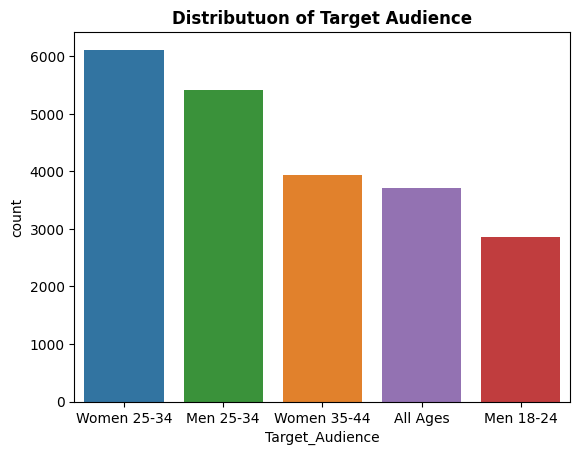

In [73]:
sns.countplot(x='Target_Audience', data=df, hue='Target_Audience', order=df.Target_Audience.value_counts().index)
plt.title('Distributuon of Target Audience', fontweight='bold')
plt.show()

- The target audience is primarily focused on individuals between 25-44 years old, with a particular emphasis on the 25-34 age range for both men and women.
- Women appear to make up a larger portion of the target audience, especially in the 25-34 age group, suggesting the product or service is more appealing or targeted towards women.
- The inclusion of the 18-24 male demographic indicates an effort to capture a younger audience, though in smaller numbers compared to other age groups.


##### Maximum Conversion Rate across Customer Segment by Language
- There is no customer segment which stands out from the crowd, showing equal potential among the customer segment.<br>
- Spanish, German, French, and Mandarin consistently show higher conversion rate across all customer segments.<br>
- There's a significant gap between English and other languages, suggesting high potential for conversion with non-English speakers.<br>
- The high performance of multiple non-English languages indicates successful localization efforts for these markets.<br>

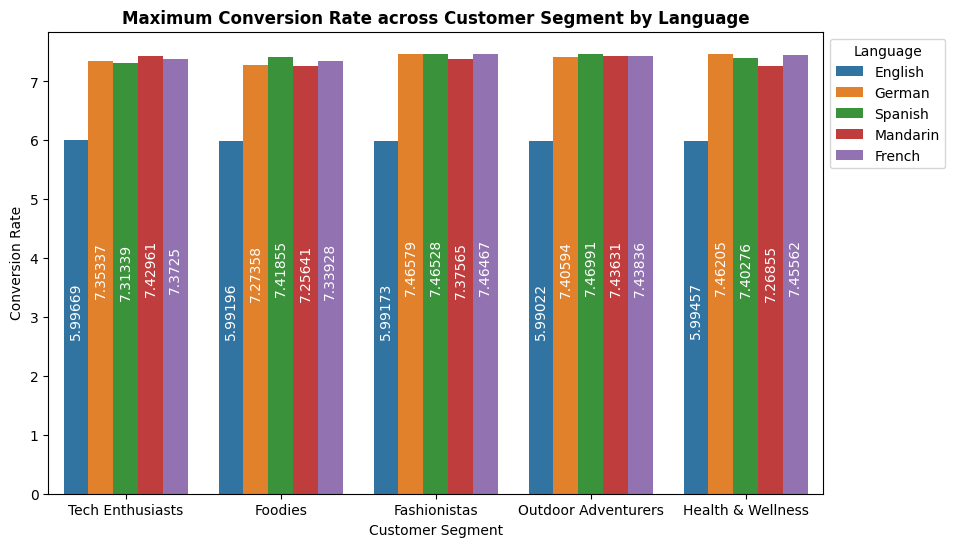

In [84]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Customer_Segment', y='Conversion_Rate', hue='Language', data=df, estimator='max', errorbar=None)
for container in ax.containers: ax.bar_label(container, padding=5, label_type='center', color='white', fontsize=10, rotation=90)
plt.title('Maximum Conversion Rate across Customer Segment by Language', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.legend(title='Language', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- **Language Influence**: French and Mandarin consistently achieve the highest conversion rates across all customer segments.
- **English Lagging**: English-speaking customers show the lowest conversion rates in every segment (~5.99).
- **Consistent Trends**: Conversion rates are generally higher for non-English languages, with slight variations across customer segments.
- **Top Segments**: Health & Wellness and Outdoor Adventurers see the highest overall conversion rates for Mandarin and French speakers.

This shows that non-English speaking audience has high potential than the English speaking audience also all campaigns shows successful localisation efforts.


##### Distribution of Acquisition Cost across Customer Segment by Channel Used

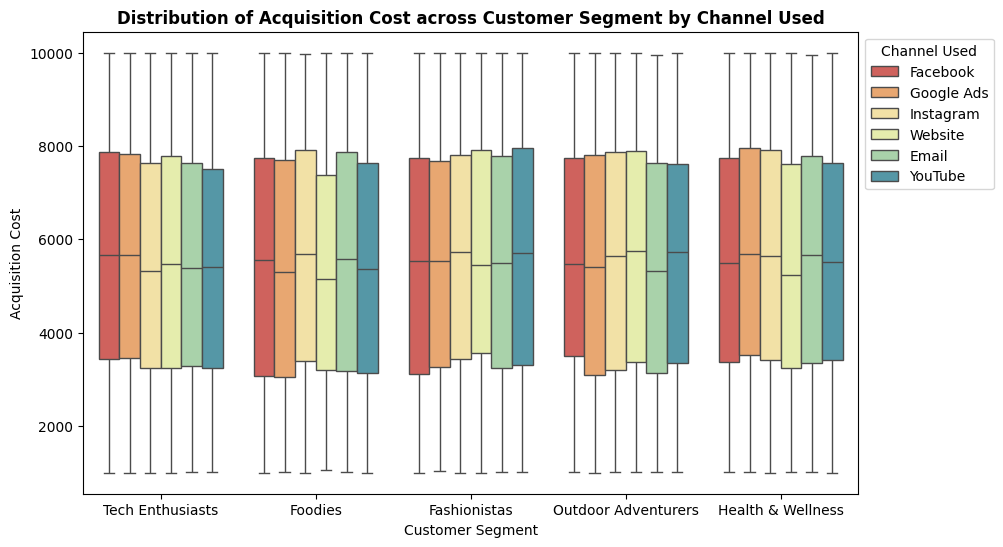

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Acquisition_Cost', x='Customer_Segment', hue='Channel_Used', data=df, palette='Spectral')
plt.title('Distribution of Acquisition Cost across Customer Segment by Channel Used', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.legend(title='Channel Used', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Acquisition Cost Insights:**
- This chart shows the full range of data without marking any points as outliers.
- There's significant variation in acquisition costs both within and across customer segments and channels, as indicated by the different box sizes and positions.
- The upper limit of 10,000 is consistent across all segments and channels, suggesting a possible cap on acquisition spending.

**Channel-Specific Insights:**
  - **Facebook** and **Google Ads** show fairly consistent acquisition costs across all segments.
  - **Email** tends to have lower acquisition costs compared to other channels.
  - **Instagram** has a relatively high acquisition cost for the **Fashionistas** segment, suggesting that Instagram is more expensive for this customer group.
  - The **Health & Wellness** segment shows less variation across most channels, indicating more consistent acquisition costs in this segment.


##### Average Conversion Rate by Language

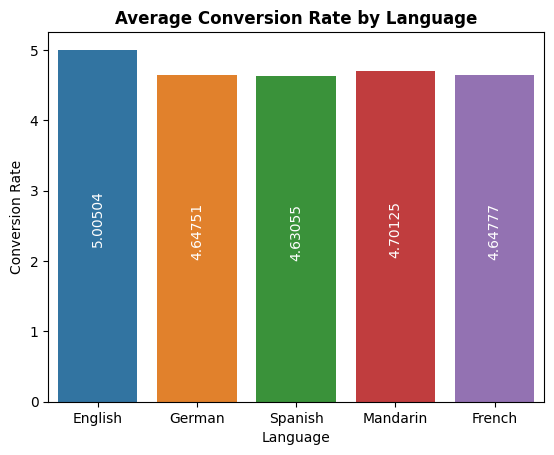

In [81]:
ax = sns.barplot(x='Language', y='Conversion_Rate', data=df, hue='Language', errorbar=None)
for container in ax.containers: ax.bar_label(container, padding=5, label_type='center', color='white', fontsize=10, rotation=90)
plt.title('Average Conversion Rate by Language', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.show()

- The conversion rates for all languages fall within a relatively narrow range, approximately between 4.5 and 5.0.
- The conversion rates for **German**, **Spanish**, **Mandarin**, and **French** are very similar, with only slight variations between them.
- The higher conversion rate for **English** could be attributed to the larger English-

##### Customer Segmentation Conclusion:
- The target audience skews toward women aged 25-34, indicating a strong appeal to this demographic. Non-English-speaking segments also show high conversion rates, reflecting the effectiveness of successful localization strategies.
- While English has the highest average conversion rate overall, the similar performance across non-English languages suggests consistent marketing effectiveness. Additionally, acquisition costs show variability across segments and channels, though they remain within a capped range.


###  Channel Effectivenes:

##### Engagement Score across Channel Used by Campaign Type

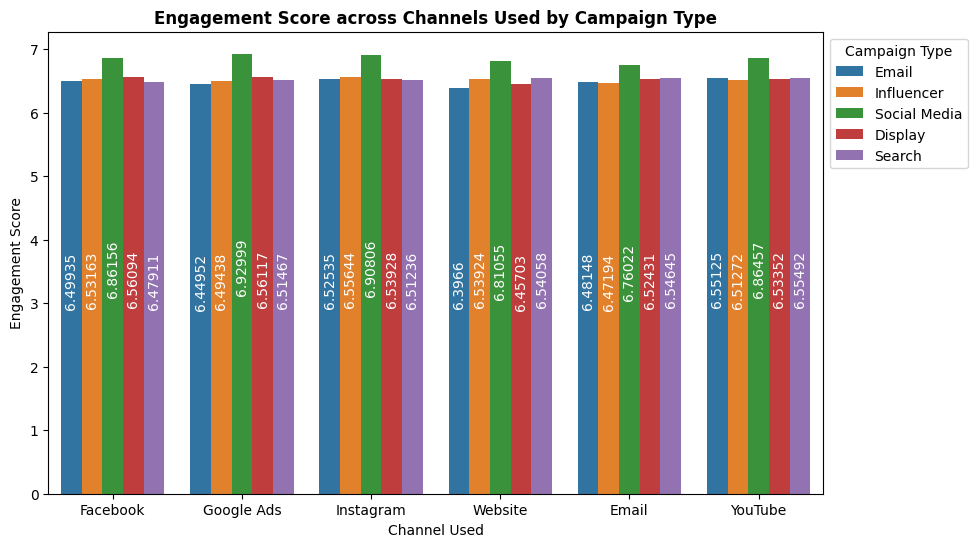

In [82]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', data=df, errorbar=None)
for container in ax.containers: ax.bar_label(container, padding=5, label_type='center', color='white', fontsize=10, rotation=90)
plt.title('Engagement Score across Channels Used by Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Engagement Score')
plt.legend(title='Campaign Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- The engagement scores are relatively consistent across all channels, with slight variations. However, no channel significantly underperforms or outperforms the others.
- **Social media campaigns** consistently show the highest engagement scores across all channels, suggesting that social media is the most effective campaign type, regardless of the platform used.
- **Social Media > Influencer ≈ Email > Display ≈ Search**. This ranking is generally consistent across all channels.
- **Email campaigns** perform slightly better on the Email channel, which aligns with expectations.
- **Influencer campaigns** seem to perform marginally better on **Instagram** compared to other channels.

##### Distribution of Total Return of Investment across Channels Used

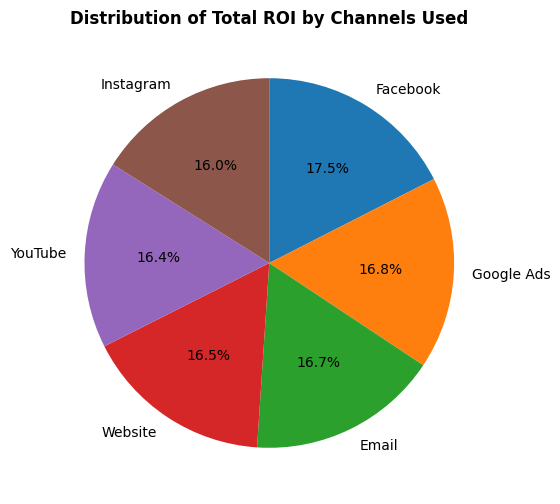

In [86]:
plt.figure(figsize=(10,6))
channel_ROI = df.groupby(by='Channel_Used')['ROI'].sum().sort_values(ascending=False)
plt.pie(channel_ROI, labels=channel_ROI.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Total ROI by Channels Used', fontweight='bold')
plt.show()

- The ROI is relatively evenly distributed across all channels, with percentages ranging from 16.0% to 17.5%. This suggests a balanced marketing strategy where no single channel dominates.
- Combined, **social media channels** (Facebook, Instagram, YouTube) account for 49.9% of total ROI, indicating a strong alignment with modern marketing trends.
- The company's **website** contributes 16.5% to the total ROI, suggesting it plays a significant role in the overall strategy.
- **Email**, with a 16.7% ROI, remains a valuable channel despite the rise of social media.
- **YouTube**, contributing 16.4% to ROI, highlights the growing importance of video content in the marketing strategy.
- Given the close percentages, even small improvements in any channel could significantly impact overall marketing performance.

##### Relationship between Clicks and Impressions by Chennel Used

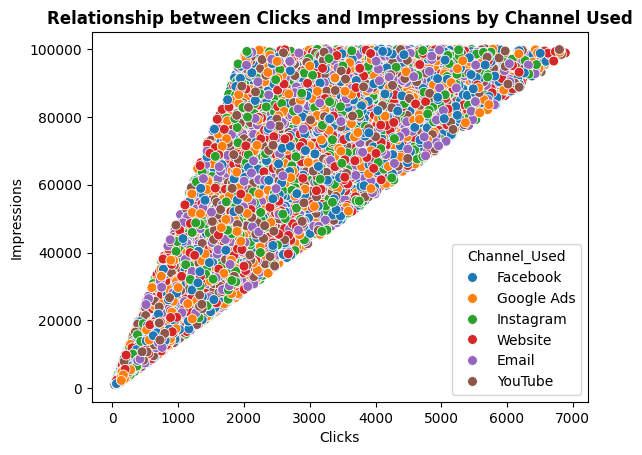

In [90]:
sns.scatterplot(x='Clicks', y='Impressions', hue='Channel_Used', data=df , color='black', s=50)
plt.title('Relationship between Clicks and Impressions by Channel Used', fontweight='bold')
plt.show()

- There's a clear positive correlation between **clicks** and **impressions**. As the number of clicks increases, so does the number of impressions.
- There seems to be an upper limit to impressions at around 100,000, regardless of how many clicks occur beyond a certain point.
- There's significant overlap between channels in terms of performance, indicating that no single channel consistently outperforms the others across all ranges.

##### Channel Effectiveness Conclusion:

- **Social media campaigns** consistently show the highest engagement, with a ranking of **Social Media > Influencer ≈ Email > Display ≈ Search**.
- **ROI** is evenly distributed across channels, with social media accounting for nearly 50% of total ROI. Despite the rise of social media, **email campaigns** continue to provide strong competition to social media platforms.
- There is a clear positive correlation between **clicks** and **impressions** across channels, but impressions seem to cap at around 100,000. No single channel consistently outperforms others in this relationship.

### Time-Base Analysis:

##### Distribution of Duration

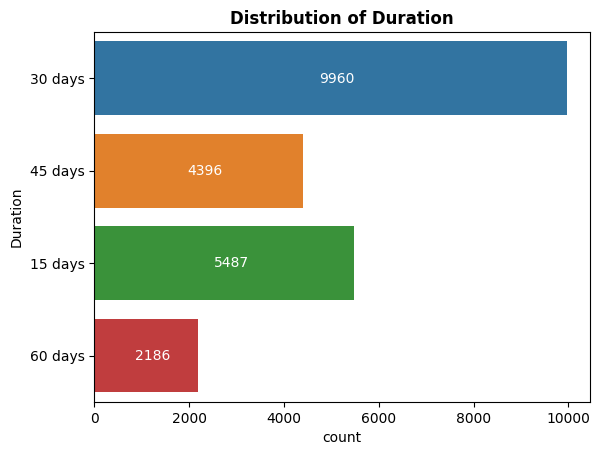

In [106]:
ax = sns.countplot(data=df, y='Duration', hue='Duration')
for container in ax.containers: ax.bar_label(container, padding=5, label_type='center', color='white', fontsize=10)
plt.title('Distribution of Duration', fontweight='bold')
plt.show()

- The **30-day** duration has the highest count, with nearly 10,000 occurrences, suggesting it's the most common or preferred duration.
- The **60-day** duration has the lowest count, around 2,000, indicating it's the least common option.
- Higher counts for **shorter durations** (15 days and 30 days) suggest that a significant portion of the data points represent shorter time periods.
- The **60-day** duration is less frequent, indicating that longer time periods are not as commonly selected.


##### Maximum Return of Investment by Campaign Duration

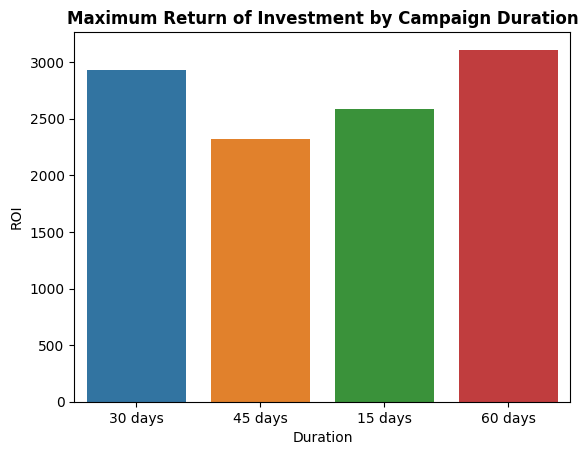

In [111]:
sns.barplot(x='Duration', y='ROI', data=df, hue='Duration', estimator='max', errorbar=None)
plt.title('Maximum Return of Investment by Campaign Duration', fontweight='bold')
plt.show()

- From the bar plot, the **30-day** campaign duration has a larger distribution than other campaign durations.
- However, the **60-day** campaign duration has the maximum ROI, indicating it has higher potential compared to other durations.

##### Conversion Rate by Date (Month)

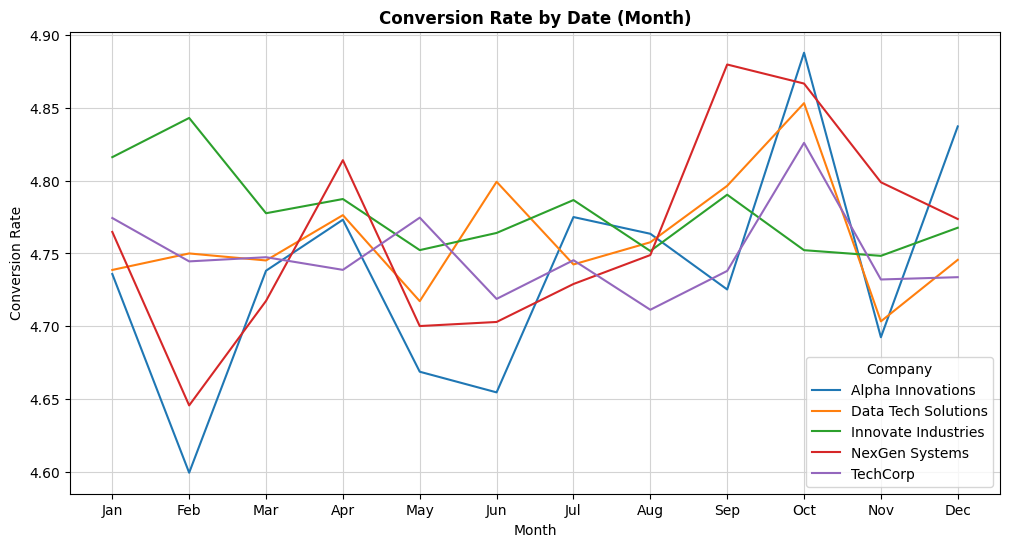

In [118]:
import calendar

# Convert Date, group by Company and Month, calculate mean Conversion_Rate
monthly_df = (df.groupby(['Company', df['Date'].dt.strftime('%b')])
               .agg(Conversion_Rate=('Conversion_Rate', 'mean')).reset_index())
# Set month order
monthly_df['Date'] = pd.Categorical(monthly_df['Date'], categories=list(calendar.month_abbr), ordered=True)
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=monthly_df)
plt.title('Conversion Rate by Date (Month)', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.grid(True, color='lightgrey')
plt.show()

- Seasonal dips in **February** and **November**, with the strongest performance from **August to October**.
- **Alpha Innovations** exhibits the most volatility, while **NexGen Systems** sees a peak in **September**.
- **TechCorp** shows a decline throughout the year, recovering later, while **Data Tech Solutions** grows until **October**, then declines sharply.
- **Innovate Industry** consistently underperforms.

##### Engagement Score over Date

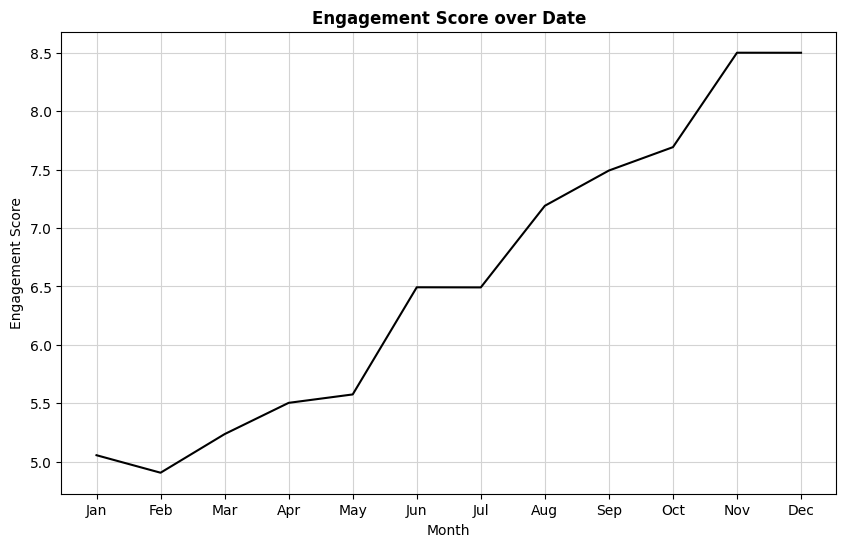

In [119]:
eng_sc = df.groupby(df['Date'].dt.strftime('%b')).agg({'Engagement_Score' : 'mean'}).reset_index()
eng_sc['Date'] = pd.Categorical(eng_sc['Date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Engagement_Score', data=eng_sc, color='black')
plt.title('Engagement Score over Date', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Engagement Score')
plt.grid(True, color='lightgrey')
plt.show()

- Engagement scores generally increase month-over-month, with **February** being the lowest.
- Significant increases occur between **May-June** and **October-November**, though **conversion rates** decrease, suggesting ineffective calls to action.
- Two plateau periods: **June-July** and **September-October**, followed by another increase.
- The year ends strong with the highest engagement scores in **November** and **December**.


##### Time-Based Analysis Conclusion:

- The **30-day** duration is the most preferred, while **60-day** durations show high potential but may need enhanced marketing efforts.
- The dip in conversion rates during **February** and **November**, despite higher engagement, suggests a need for stronger **Calls to Action (CTA)**.
- **Innovate Industry** shows a consistent decline in conversion rates, requiring focused improvement.
- Engagement spikes in **May-June** and **October-November**, offering opportunities for impactful campaigns.
- Engagement stabilizes in **June-July** and **September-October**, indicating a need for re-engagement strategies to avoid stagnation.

### Geographic Analysis:

##### Acquisition Cost by Location

##### Performance Perspective

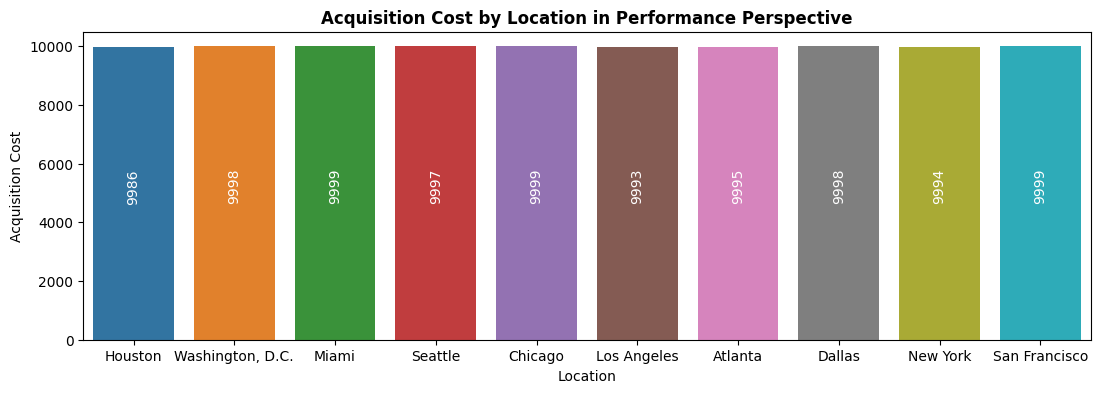

In [128]:
plt.figure(figsize=(13, 4))
ax = sns.barplot(x='Location', y='Acquisition_Cost', data=df, hue='Location', estimator='max', errorbar=None)
for container in ax.containers: ax.bar_label(container, padding=5, label_type='center', color='white', fontsize=10, rotation=90)
plt.title('Acquisition Cost by Location in Performance Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')
plt.show()

- There is no significant difference between locations.
- Same acquisition costs across locations could be beneficial if due to resource allocation or standardization. However, it may also indicate that the campaign is not optimizing for local market differences. Acquisition strategies should be flexible to maximize efficiency and ROI.


##### Volume Perspective

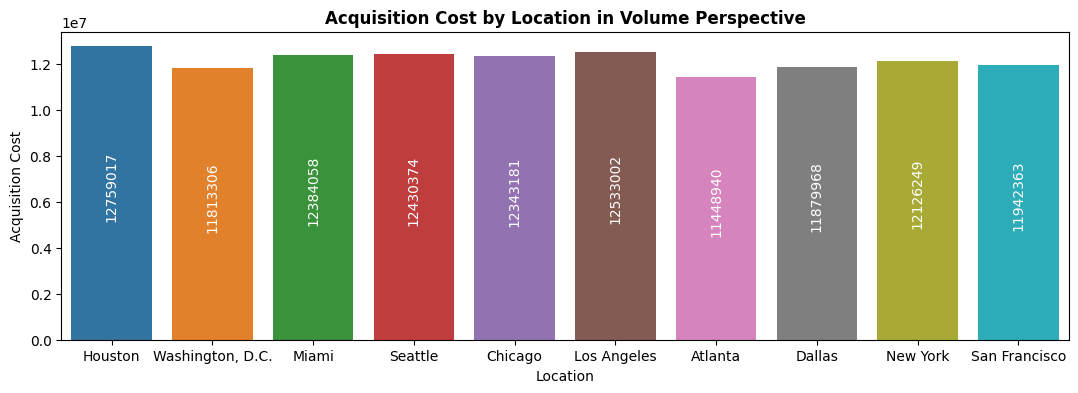

In [130]:
plt.figure(figsize=(13, 4))
ax = sns.barplot(x='Location', y='Acquisition_Cost', data=df, hue='Location', estimator='sum', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, padding=5, label_type='center', color='white', fontsize=10, rotation=90, labels=[int(v) for v in container.datavalues])
plt.title('Acquisition Cost by Location in Volume Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')
plt.show()

- All cities are major metropolitan areas, indicating the data focuses on high-value, competitive urban markets.
- There’s no clear geographic pattern, with cities from various regions (West Coast, East Coast, South, Midwest) spread across the range.
- **Houston** has the highest total acquisition cost, suggesting it has the largest volume.
- Cities like **Atlanta**, **Washington D.C.**, and **Dallas** may offer better ROI potential due to lower acquisition costs.

##### Efficiency Perspective

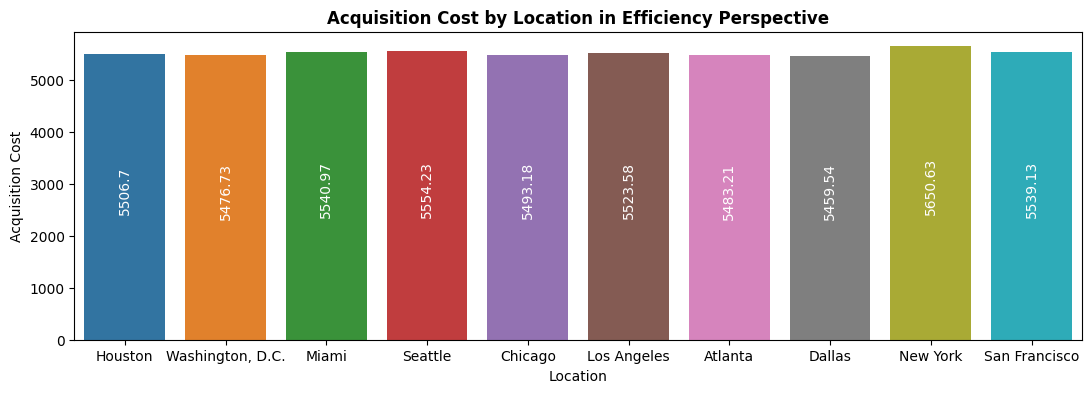

In [131]:
plt.figure(figsize=(13, 4))
ax = sns.barplot(x='Location', y='Acquisition_Cost', data=df, hue='Location', estimator='mean', errorbar=None)
for container in ax.containers: ax.bar_label(container, padding=5, label_type='center', color='white', fontsize=10, rotation=90)
plt.title('Acquisition Cost by Location in Efficiency Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')
plt.show()

- **New York** has a slightly taller bar, indicating higher value per acquisition (quality).
- The remaining locations show similar bar heights, suggesting more or less equal value per acquisition.

##### Conversion Rate across Location by Target Audience

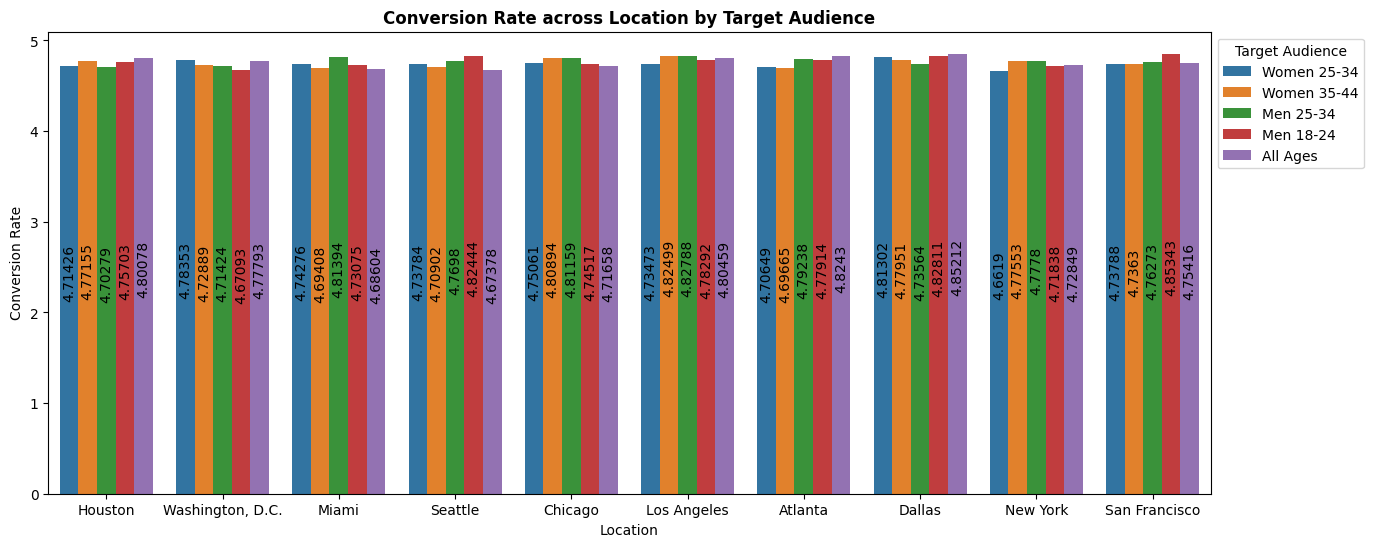

In [134]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Location', y='Conversion_Rate', hue='Target_Audience', data=df, errorbar=None)
for container in ax.containers: ax.bar_label(container, padding=5, label_type='center', color='black', fontsize=10, rotation=90)
plt.title('Conversion Rate across Location by Target Audience', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.legend(title='Target Audience', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- Conversion rates are consistent across locations and target audiences, generally between 4.5 and 5.
- Younger demographics (18-24 and 25-34) tend to outperform the "All Ages" category, suggesting they may be more responsive.
- Segmented demographics generally outperform "All Ages", indicating targeted marketing is more effective.
- Men’s demographics slightly outperform women’s, though the gap is minimal.
- Despite targeting more women in the 25-34 age range, men in the 18-24 category tend to have higher conversion rates in most cities, though the differences are small.
- **Dallas** shows the most variation between demographics, suggesting opportunities for more targeted strategies, while **New York** has consistent rates across demographics, indicating well-performing campaigns.

##### Return of Investment by Location

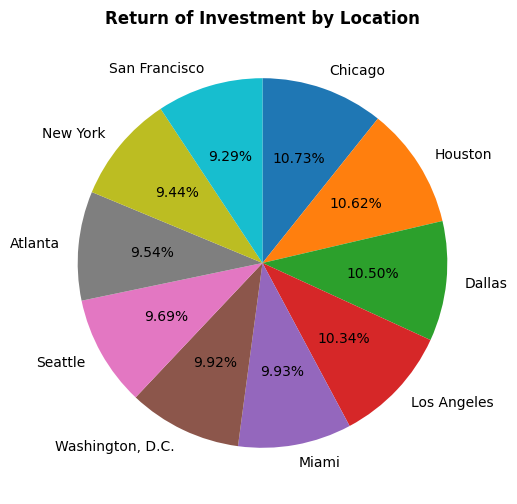

In [136]:
plt.figure(figsize=(10, 6))
location_ROI = df.groupby('Location')['ROI'].sum().sort_values(ascending=False)
plt.pie(location_ROI, labels=location_ROI.index, autopct='%1.2f%%', startangle=90, counterclock=False)
plt.title('Return of Investment by Location', fontweight='bold')
plt.show()

- Returns are fairly evenly distributed across the 10 cities, ranging from 9.3% to 10.7%.
- The narrow range of returns (1.4% difference) suggests a competitive and efficient market across these major cities.
- Surprisingly, traditionally "hot" real estate markets like **San Francisco** and **New York** show lower returns.

##### Geographic Analysis Conclusion:

- While **Houston** has the highest sum of acquisition costs and **New York** has the highest average cost, it’s important to ensure ROI aligns with these costs before making significant investments.
- **Dallas** and **Chicago** demonstrate lower acquisition costs and high ROI, indicating strong campaign performance in these cities.
- Younger audiences (ages 18-34) are more responsive, suggesting tailored strategies for these segments can improve conversion rates.
- **Dallas** shows notable demographic variation in conversion rates, suggesting the need for localized campaigns targeting different segments.
- **San Francisco** and **New York**, despite being hot markets, show lower returns with high acquisition costs, warranting a reevaluation of strategies in these areas.

### Recommendations

- ##### Refine Targeting:
      Focus on optimizing targeting strategies to reduce acquisition costs, particularly for high-ROI segments. Extend campaign durations during high-engagement months (e.g., April, July) to nurture leads and increase conversions.

- ##### Enhance Localization:
      Continue leveraging successful localization strategies for non-English markets, refining content for better conversion efficiency across all languages.

- ##### Focus on High-Impact Channels:
      Prioritize social media, especially influencer marketing, due to its strong engagement and ROI. At the same time, maintain email campaigns for their consistent performance at lower acquisition costs.

- ##### Optimize Seasonal Campaigns:
      Address dips in performance during February and November by improving Calls to Action and tailoring content to better engage users in these months.

This analysis offers actionable insights to optimize marketing efforts, driving higher ROI and sustained growth across channels, audiences, and geographies.